<div>
    <h1><center style="background-color:#87CEFA; color:white; font-size: 80px;"> Bitcoin
        EDA and Prediction</center></h1>
</div>


<div>
<img src="https://thumbs.gfycat.com/IllSharpCod-max-1mb.gif" width='350'>
</div>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background-color:#87CEFA;font-size: 50px; border:0' role="tab" aria-controls="home" color=black><center>Quick navigation</center></h3>

* [1. Required Libraries](#1)
* [2. Dataset Quick Overview & Pre-Processing](#2)
* [3. Features generation](#3)
* [4. Distribution of Features](#4)
* [5. Correlation Analysis ](#5)   




<div class="alert alert-info">
<h3><center>Bitcoin[a] (₿) is a cryptocurrency invented in 2008 by an unknown person or group of people using the name Satoshi Nakamoto.<center><h3>
<h4>Some interesting facts about Bitcoin(BTC):</h4>
<h5>1.Bitcoin is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries. Transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain.</h5>
<h5>2. In fact, there are only 21 million bitcoins that can be mined in total.Once miners have unlocked this amount of bitcoins, the supply will be exhausted.</h5>
<h5>3. Currently, around 18.5 million bitcoin have been mined. This leaves less than three million that have yet to be introduced into circulation.</h5>
</div>

<a id="1"></a>
<h2 style='background-color:#87CEFA; border:0; color:black'><center>Required Libraries</center><h2>

In [49]:

#Data Pre-Processing packages:
import numpy as np 
import pandas as pd 
from datetime import datetime


#Data Visualization Packages:
#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.WHITE

#garbage collector - To free up unused space
import gc
gc.collect()


#Time -To find how long each cell takes to run
import time
import datetime

#Importing of Data 
data=pd.read_csv(r'C:\Users\rajat\Downloads\bitcoindata.csv')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)



<a id="2"></a>
<h2 style='background-color:#87CEFA; border:0; color:black'><center>Data set Overview & Pre-Processing</center><h2>

In [50]:
print(f"{m_}Total records:{y_}{data.shape}\n")
print(f"{m_}Data types of data columns: \n{y_}{data.dtypes}")

Total records:(4857377, 8)

Data types of data columns: 
Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


<div class="alert alert-info">
    <h3 color:black><center><b> Data Pre-processing steps</b></center></h3>
    <p> 1. <b>Date</b> - We need to convert the Hourly data to Daily based data </p>
    <p> 2. <b>Fill in the missing values interpolation</p>

</div>

<div class='alert alert-info'>
<h3> The data is available on a Hourly based on each day, So we need to resample them to day based.</h3>
</div>

In [52]:
data['Timestamp'] = [datetime.datetime.fromtimestamp(x) for x in data['Timestamp']]
data = data.set_index('Timestamp')
data = data.resample("24H").mean()
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.710000,4.710000,4.710000,4.710000,5.751000,27.639580,4.710000
2012-01-02,5.000000,5.000000,5.000000,5.000000,10.100000,50.500000,5.000000
2012-01-03,5.224444,5.224444,5.224444,5.224444,11.898365,62.227246,5.224444
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


<div class="alert alert-info">
    <h3><b><center>Missing values</center><b></h3>
</div>


Open                 5
High                 5
Low                  5
Close                5
Volume_(BTC)         5
Volume_(Currency)    5
Weighted_Price       5
dtype: int64

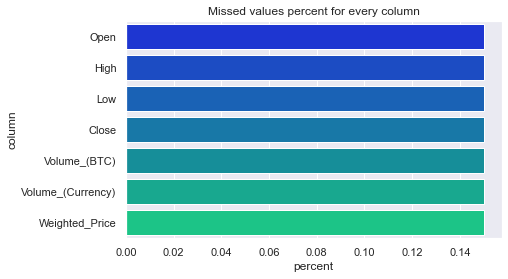

In [53]:
missed = pd.DataFrame()
missed['column'] = data.columns

missed['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]

fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal',palette="winter"
).set_title('Missed values percent for every column')

data.isnull().sum()

<div class="alert alert-info">
    <h3><b><center>Let's interpolate to fill in the missing values</center><b></h3>
</div>


In [54]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()
    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()
    print(f'{m_}No. of Missing values after interpolation:\n{y_}{df.isnull().sum()}')
    
fill_missing(data)

No. of Missing values after interpolation:
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


<a id="3"></a>
<h2 style='background-color:#87CEFA; border:0; color:black'><center>Feature Generation</center><h2>

In [55]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [56]:
new_df=data.groupby('Timestamp').mean()
new_df=new_df[['Volume_(BTC)', 'Close','Volume_(Currency)']]
new_df.rename(columns={'Volume_(BTC)':'Volume_market_mean','Close':'close_mean','Volume_(Currency)':'volume_curr_mean'},inplace=True)
new_df.head()

,Volume_market_mean,close_mean,volume_curr_mean
Timestamp,,,
2011-12-31,23.829470,4.482500,106.330084
2012-01-01,5.751000,4.710000,27.639580
2012-01-02,10.100000,5.000000,50.500000
2012-01-03,11.898365,5.224444,62.227246
2012-01-04,11.914807,5.223333,63.119577


In [57]:
data_df = data.merge(new_df, left_on='Timestamp',
                                right_index=True)
data_df['volume(BTC)/Volume_market_mean'] = data_df['Volume_(BTC)'] / data_df['Volume_market_mean']
data_df['Volume_(Currency)/volume_curr_mean'] = data_df['Volume_(Currency)'] / data_df['volume_curr_mean']

data_df['close/close_market_mean'] = data_df['Close'] / data_df['close_mean']
data_df['open/close'] = data_df['Open'] / data_df['Close']
data_df["gap"] = data_df["High"] - data_df["Low"] 
data_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Volume_market_mean,close_mean,volume_curr_mean,volume(BTC)/Volume_market_mean,Volume_(Currency)/volume_curr_mean,close/close_market_mean,open/close,gap
Timestamp,,,,,,,,,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,23.829470,4.482500,106.330084,1.0,1.0,1.0,0.996096,0.017500
2012-01-01,4.710000,4.710000,4.710000,4.710000,5.751000,27.639580,4.710000,5.751000,4.710000,27.639580,1.0,1.0,1.0,1.000000,0.000000
2012-01-02,5.000000,5.000000,5.000000,5.000000,10.100000,50.500000,5.000000,10.100000,5.000000,50.500000,1.0,1.0,1.0,1.000000,0.000000
2012-01-03,5.224444,5.224444,5.224444,5.224444,11.898365,62.227246,5.224444,11.898365,5.224444,62.227246,1.0,1.0,1.0,1.000000,0.000000
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159,11.914807,5.223333,63.119577,1.0,1.0,1.0,0.995533,0.023333


<div class='alert alert-info'>
     <p> Sometimes, the data set might be too huge to process, since we are using dataframe. To make sure we dont hold up too much RAM. We could try other approaches like</p>
     <p> 1. use gc.collect() - collects all the garbage values </p>
     <p> 2. del dataframe - free up some space by deleting the unused dataframe using the del command </p>
     <p> 3. Reduce the memory usage based on the data types of the columns in the dataframe(shown below)</p>
</div>

In [58]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)
print(f'{m_}Memory of the dataframe:\n{y_}{mem_usage(data_df)}')

Memory of the dataframe:
0.41 MB


In [59]:
#All the columns in float64 format, we can downsize them to float32 to reduce memory usage 
data_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3379 entries, 2011-12-31 to 2021-03-31
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Open                                3379 non-null   float64
 1   High                                3379 non-null   float64
 2   Low                                 3379 non-null   float64
 3   Close                               3379 non-null   float64
 4   Volume_(BTC)                        3379 non-null   float64
 5   Volume_(Currency)                   3379 non-null   float64
 6   Weighted_Price                      3379 non-null   float64
 7   Volume_market_mean                  3379 non-null   float64
 8   close_mean                          3379 non-null   float64
 9   volume_curr_mean                    3379 non-null   float64
 10  volume(BTC)/Volume_market_mean      3379 non-null   float64
 11  Volume_(Currency)/volume_

<div class='alert alert-info'>
<h3>We can use the function pd.to_numeric() to downcast our float types. We’ll use DataFrame.select_dtypes to select only the float columns, then we’ll optimize the types and compare the memory usage.</h3>
</div>

In [60]:
gl_float = data_df.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['Before','After']
compare_floats.apply(pd.Series.value_counts)

,Before,After
float32,NaN,15.0
float64,15.0,NaN


In [61]:
print(f"{m_}Before float conversion:\n{y_}{mem_usage(data_df)}")
data_df[converted_float.columns] = converted_float
print(f"{m_}After float conversion:\n{y_}{mem_usage(data_df)}")

Before float conversion:
0.41 MB
After float conversion:
0.22 MB


<div class='alert alert-info'>
    <h3>We have successfully reduced the size of the dataframe by 50%. Eventhough, the size of the dataframe used here is small in this analysis. It's always a good aprroach to reduce the memory usage</h3>
</div>

<a id="4"></a>
<h2 style='background-color:#87CEFA; border:0; color:black'><center>Distribution of Features</center><h2>

<div class="alert alert-info">
    <h3><b>Let's Visualize the distribution of the key variables like Opening price, Highest price, Lowest price and Volume in Bitcoin<b></h3>
</div>


                                 DISTRIBUTION AT OPENING PRICE


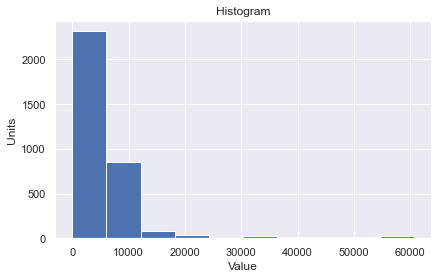

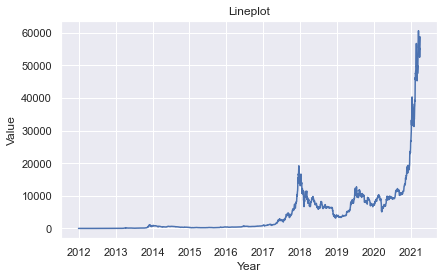

In [62]:

print("                                 DISTRIBUTION AT OPENING PRICE")

plt.hist(data['Open'])
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Units")
plt.show()

plt.plot(data['Open'])
plt.title("Lineplot")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


                                 DISTRIBUTION OF HIGHEST PRICE


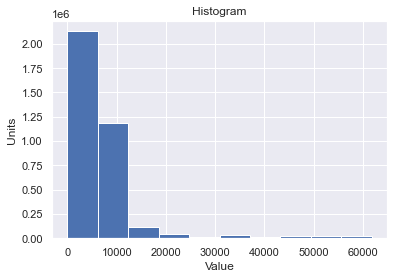

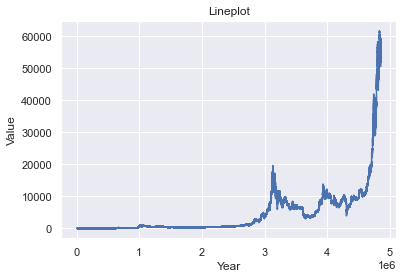

In [7]:

print("                                 DISTRIBUTION OF HIGHEST PRICE")

plt.hist(data['High'])
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Units")
plt.show()

plt.plot(data['High'])
plt.title("Lineplot")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()



                                 DISTRIBUTION OF LOWEST PRICE


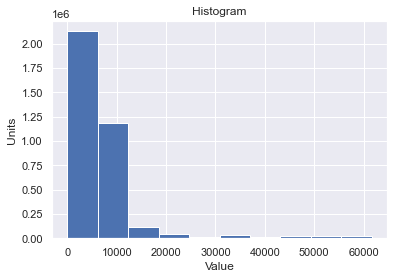

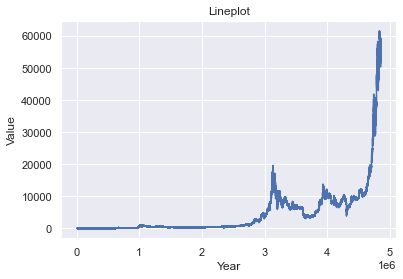

In [8]:

print("                                 DISTRIBUTION OF LOWEST PRICE")

plt.hist(data['Low'])
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Units")
plt.show()

plt.plot(data['Low'])
plt.title("Lineplot")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


                                 DISTRIBUTION OF CLOSING PRICE


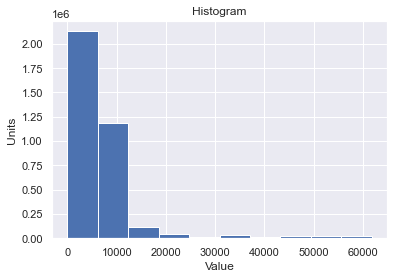

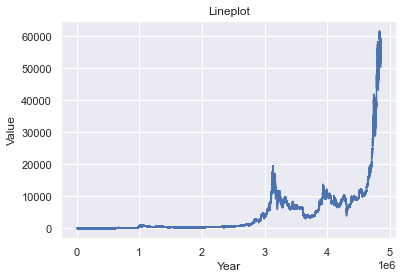

In [9]:
print("                                 DISTRIBUTION OF CLOSING PRICE")

plt.hist(data['Close'])
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Units")
plt.show()

plt.plot(data['Close'])
plt.title("Lineplot")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

<a id="5"></a>
<h2 style='background-color:#87CEFA; border:0; color:black'><center>Correlation Analysis</center><h2>

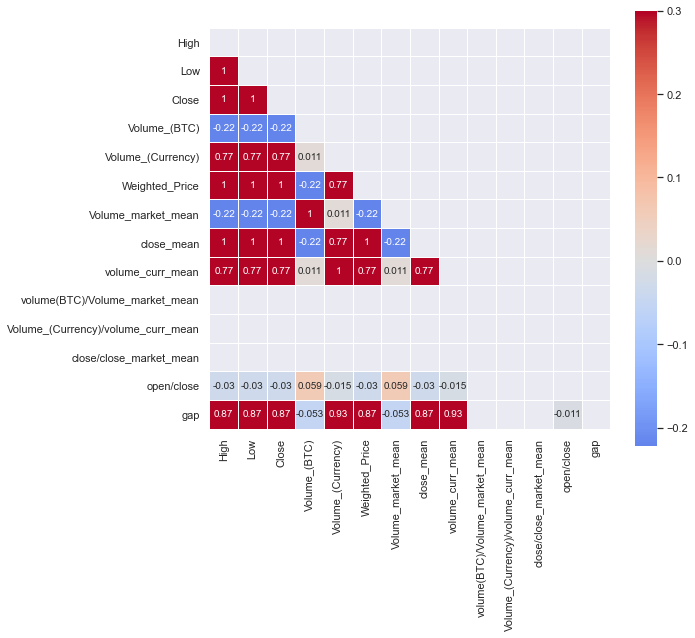

In [63]:
plt.figure(figsize=(8,8))
corr=data_df[data_df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data_df[data_df.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

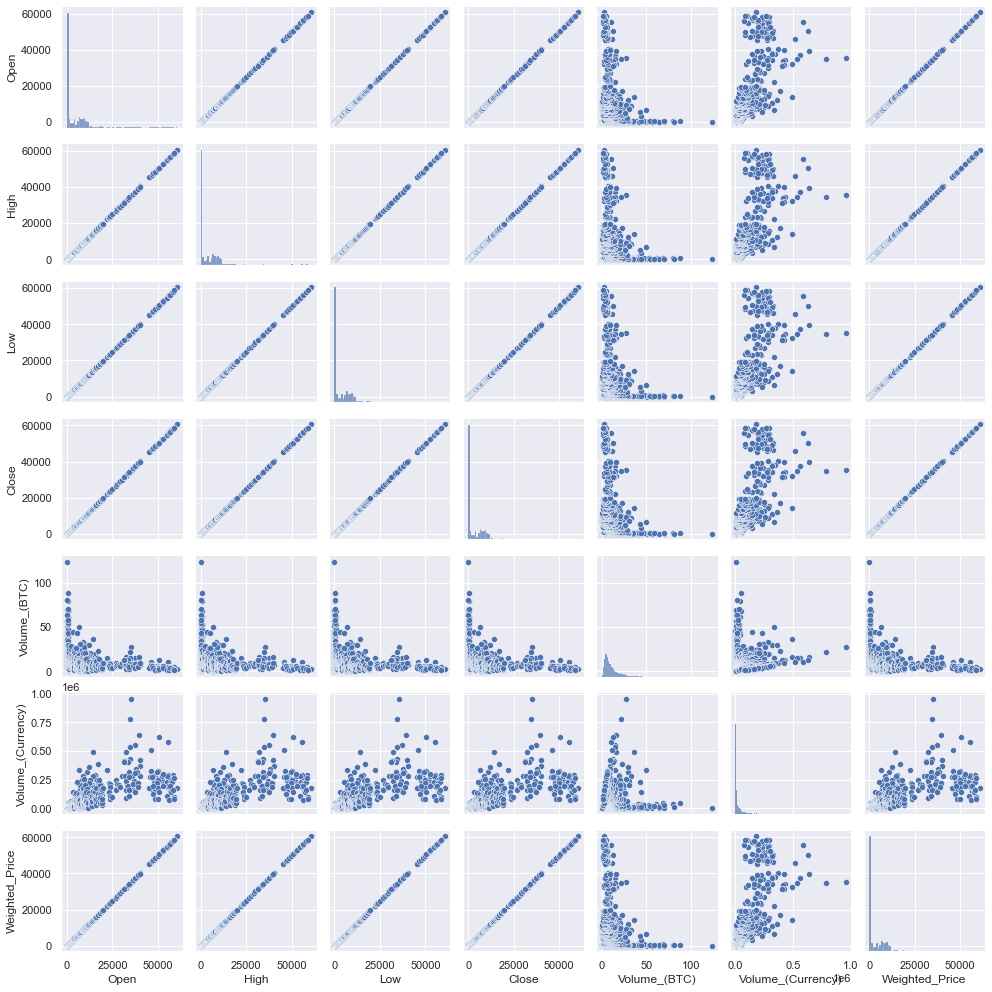

In [64]:
sns.pairplot(data,height=2)

<a id="5"></a>
<h2 style='background-color:#87CEFA; border:0; color:black'><center>Prediction</center><h2>

## Predictiong using LSTM

In [7]:
import datetime, pytz
#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))



In [8]:
#data=pd.read_csv(r'C:\Users\rajat\Downloads\bitcoindata.csv')
data = pd.read_csv(r'C:\Users\rajat\Downloads\bitcoindata.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

In [34]:
# split data
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()


In [35]:
# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

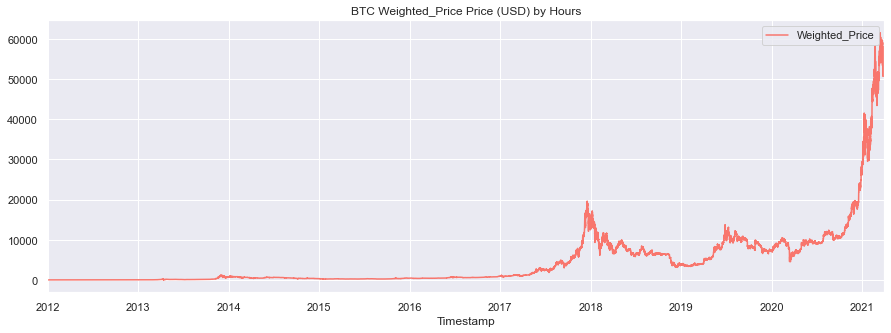

In [36]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

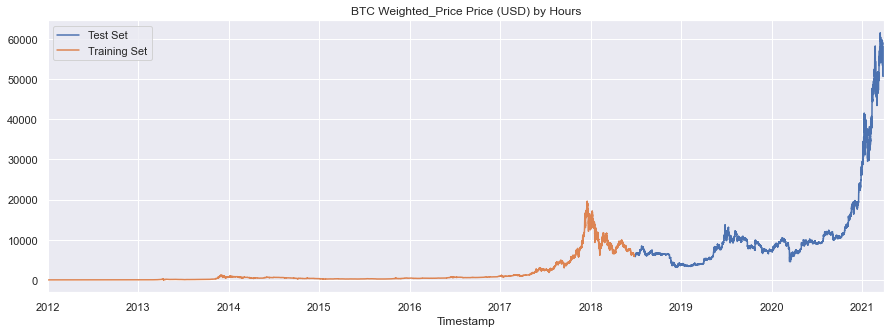

In [37]:

_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [38]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
1137/1137 - 3s - loss: 0.0307
Epoch 2/100
1137/1137 - 1s - loss: 0.0070
Epoch 3/100
1137/1137 - 1s - loss: 0.0034
Epoch 4/100
1137/1137 - 1s - loss: 0.0022
Epoch 5/100
1137/1137 - 1s - loss: 0.0015
Epoch 6/100
1137/1137 - 1s - loss: 0.0012
Epoch 7/100
1137/1137 - 1s - loss: 9.5288e-04
Epoch 8/100
1137/1137 - 1s - loss: 7.8745e-04
Epoch 9/100
1137/1137 - 1s - loss: 6.6343e-04
Epoch 10/100
1137/1137 - 1s - loss: 5.8482e-04
Epoch 11/100
1137/1137 - 1s - loss: 5.0612e-04
Epoch 12/100
1137/1137 - 1s - loss: 4.5317e-04
Epoch 13/100
1137/1137 - 1s - loss: 4.0417e-04
Epoch 14/100
1137/1137 - 1s - loss: 3.7413e-04
Epoch 15/100
1137/1137 - 1s - loss: 3.2783e-04
Epoch 16/100
1137/1137 - 1s - loss: 3.1415e-04
Epoch 17/100
1137/1137 - 1s - loss: 2.9230e-04
Epoch 18/100
1137/1137 - 1s - loss: 2.8017e-04
Epoch 19/100
1137/1137 - 1s - loss: 2.6398e-04
Epoch 20/100
1137/1137 - 1s - loss: 2.5537e-04
Epoch 21/100
1137/1137 - 1s - loss: 2.4161e-04
Epoch 22/100
1137/1137 - 1s - loss: 2.3009e-04

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


In [41]:
data_test['Weighted_Price_Prediction'] = predicted_BTC_price
data_all = pd.concat([data_test, data_train], sort=False)


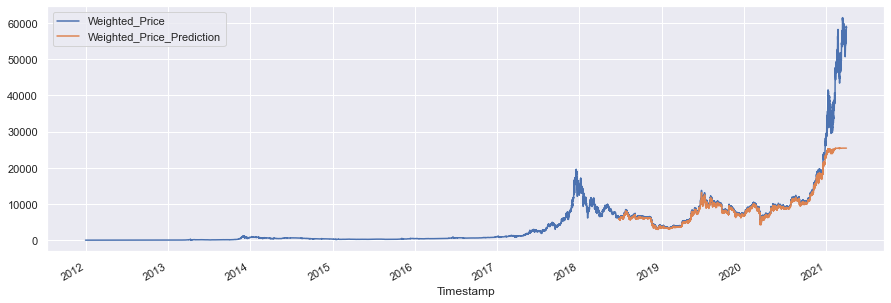

In [42]:
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

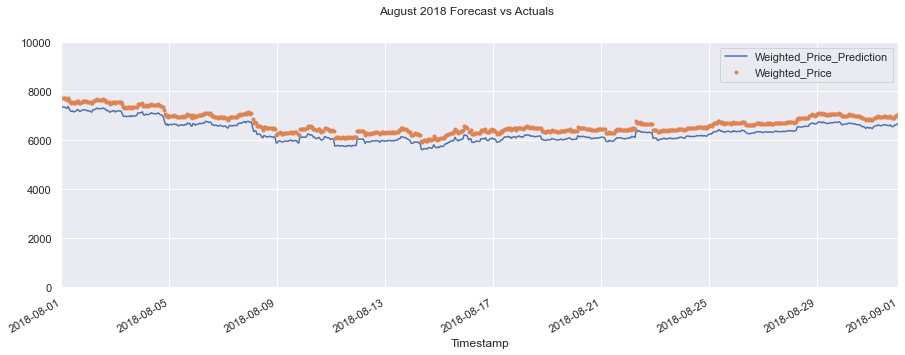

In [44]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

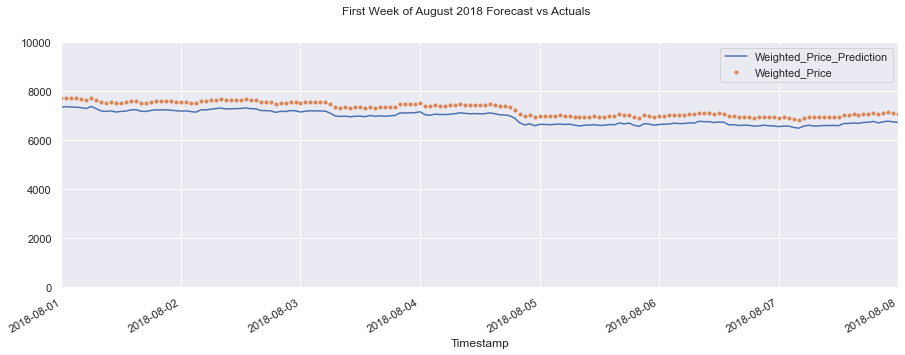

In [45]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')

In [46]:
#calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

42035684.67396569

In [47]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

2140.1472167922766

## Predictiong using XGBoost

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [51]:
data = pd.read_csv(r'C:\Users\rajat\Downloads\bitcoindata.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

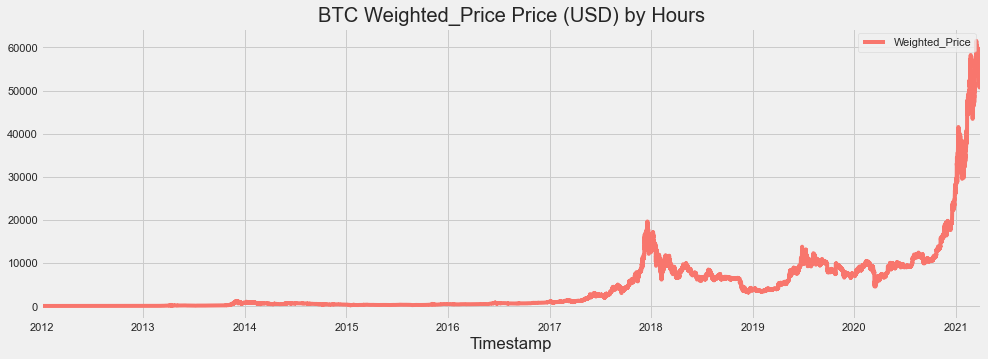

In [52]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

In [53]:
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

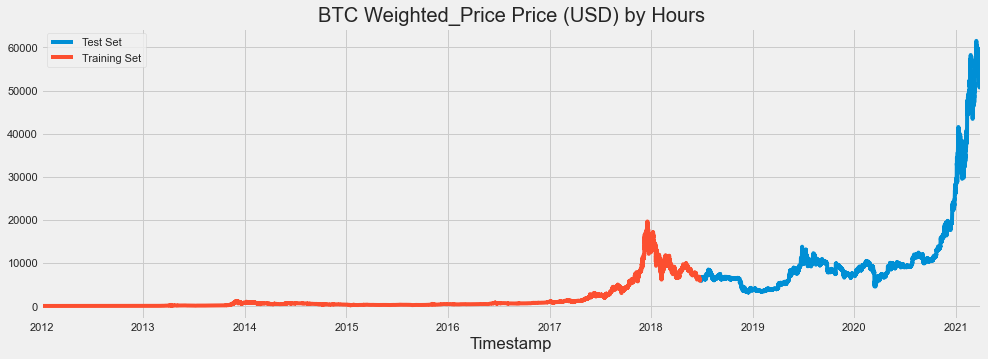

In [54]:
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [55]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [56]:
X_train, y_train = create_features(data_train, label='Weighted_Price')
X_test, y_test = create_features(data_test, label='Weighted_Price')

In [59]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) 

[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3320.30005	validation_1-rmse:16182.25586
[1]	validation_0-rmse:3258.31665	validation_1-rmse:16080.29981
[2]	validation_0-rmse:3205.79468	validation_1-rmse:15990.52734
[3]	validation_0-rmse:2892.94507	validation_1-rmse:15431.64356
[4]	validation_0-rmse:2859.69873	validation_1-rmse:15363.00977
[5]	validation_0-rmse:2827.14648	validation_1-rmse:15299.42773
[6]	validation_0-rmse:2801.16162	validation_1-rmse:15242.85644
[7]	validation_0-rmse:2529.79394	validation_1-rmse:14782.02832
[8]	validation_0-rmse:2510.09204	validation_1-rmse:14738.80273
[9]	validation_0-rmse:2287.06152	validation_1-rmse:14315.98340
[10]	validation_0-rmse:2063.71387	validation_1-rmse:13985.69336
[11]	validation_0-rmse:2052.43359	validation_1-rmse:13956.51660
[12]	validation_0-rmse:1875.75842	validation_1-rmse:13640.34082
[

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [60]:
data_test['Weighted_Price_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

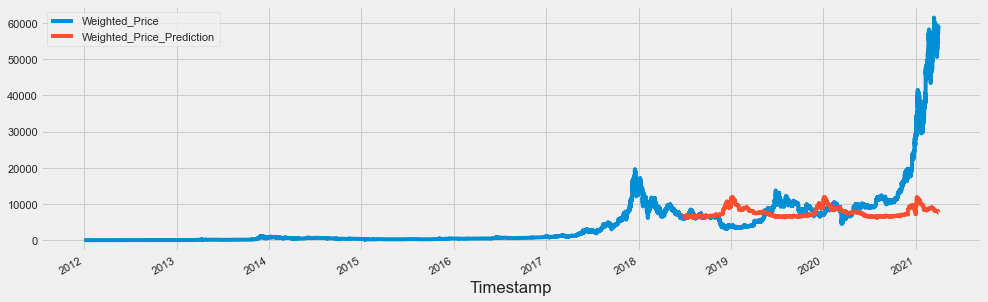

In [62]:
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

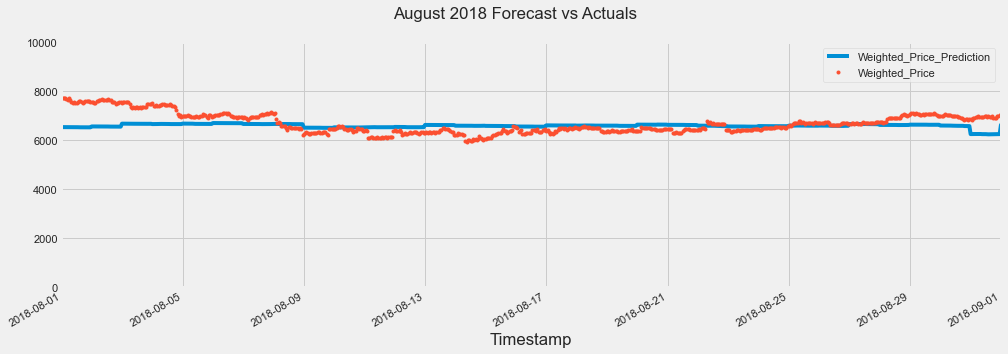

In [63]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('August 2018 Forecast vs Actuals')

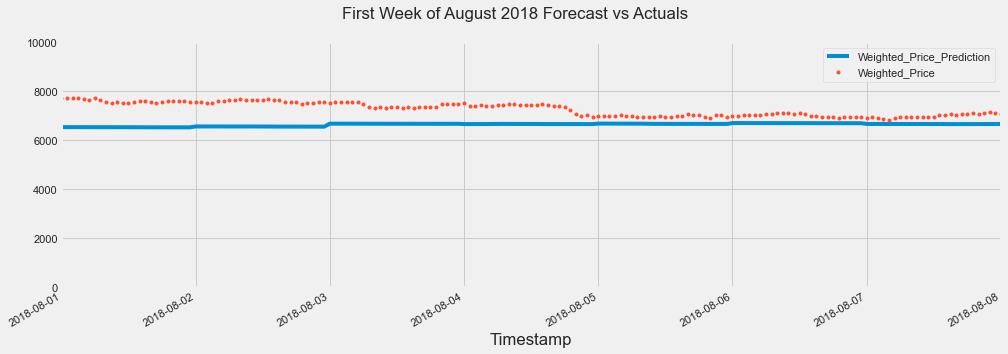

In [64]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Weighted_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')

In [66]:
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

139161895.81126237

In [65]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

6070.275551957579

## Predictiong using Prophet

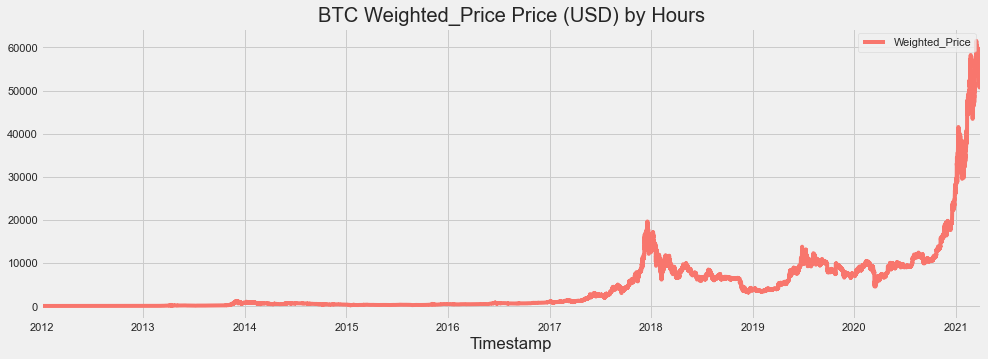

In [67]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

In [ ]:
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()


In [ ]:
data_train = data_train.reset_index().rename(columns={'Timestamp':'ds', 'Weighted_Price':'y'})

In [ ]:
# Setup and train model
model = Prophet()
model.fit(data_train)

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_test_fcst, ax=ax)

In [ ]:
# Plot the components
fig = model.plot_components(data_test_fcst)

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['Weighted_Price'], color='r')
fig = model.plot(data_test_fcst, ax=ax)
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forecast vs Actuals')

In [ ]:
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test_fcst['yhat'])

In [ ]:
mean_absolute_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test_fcst['yhat'])

## Prediction using ARIMA 

In [69]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [70]:
data = pd.read_csv(r'C:\Users\rajat\Downloads\bitcoindata.csv',parse_dates=[0], date_parser=dateparse) 

In [72]:
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)
data['Weighted_Price'].fillna(method='ffill', inplace=True)
data['Volume_(BTC)'].fillna(method='ffill', inplace=True)
data['Volume_(Currency)'].fillna(method='ffill', inplace=True)

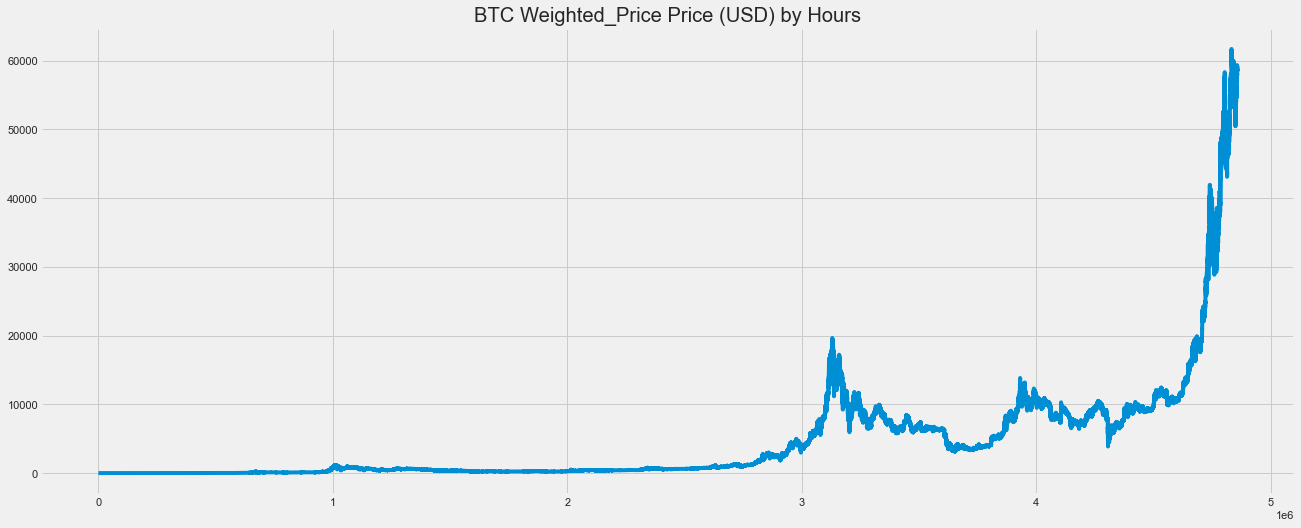

In [73]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Hours')
plt.plot(data.Weighted_Price, '-', label='By Hours')

In [74]:
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='M')]).first().reset_index()
data = data.set_index('Timestamp')
data['Weighted_Price'].fillna(method='ffill', inplace=True)

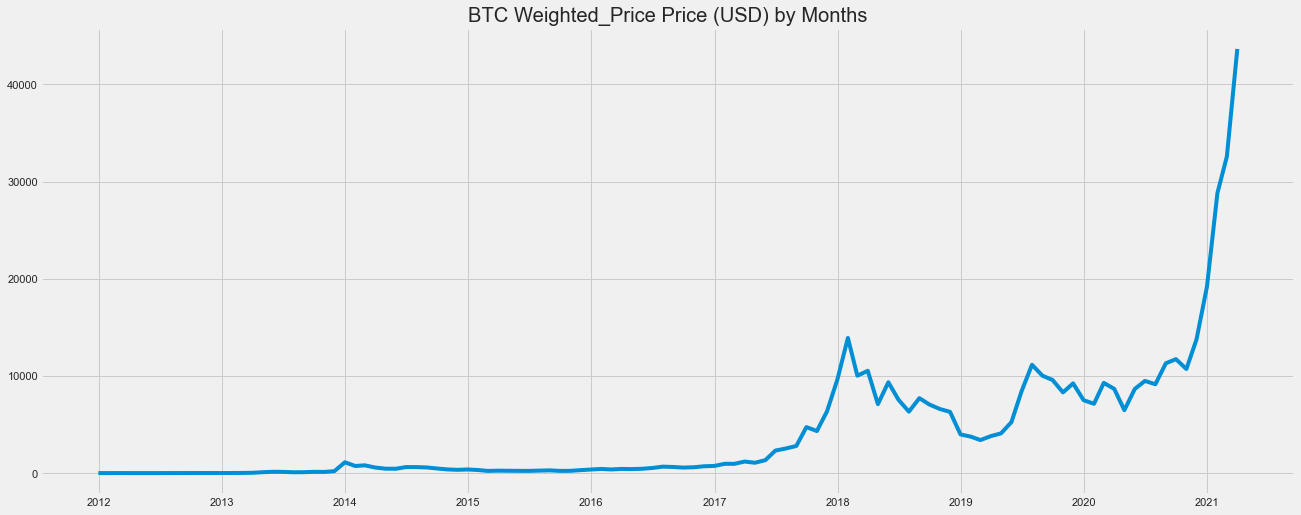

In [75]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Months')
plt.plot(data.Weighted_Price, '-', label='By Months')

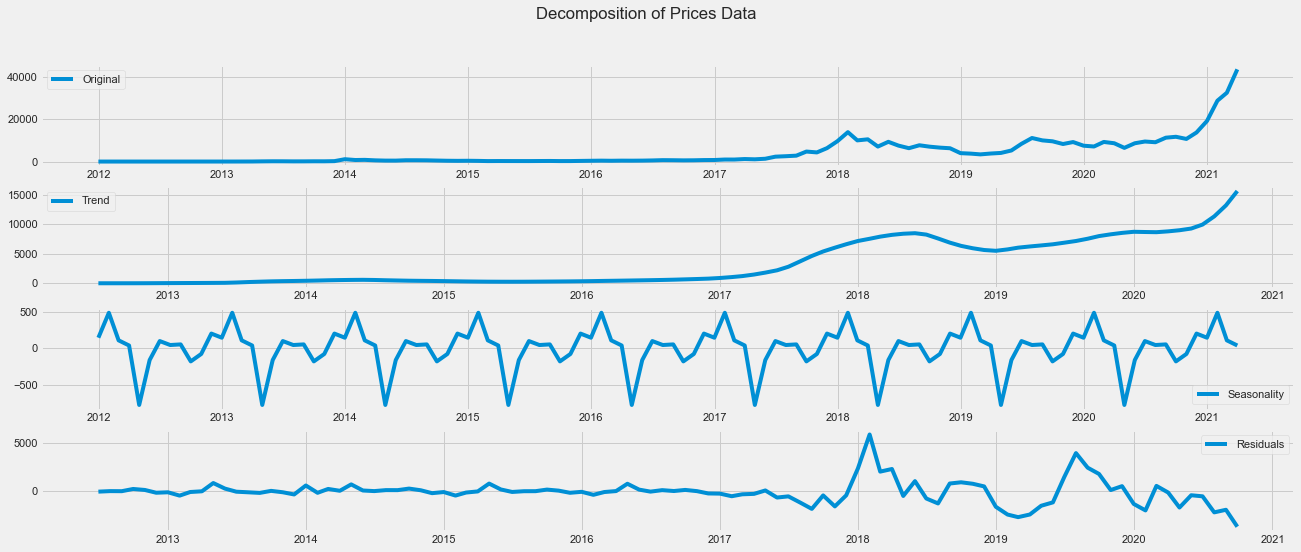

In [76]:
decomposition = sm.tsa.seasonal_decompose(data.Weighted_Price)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(data.Weighted_Price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [77]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data.Weighted_Price)[1])

Dickey–Fuller test: p=0.999033


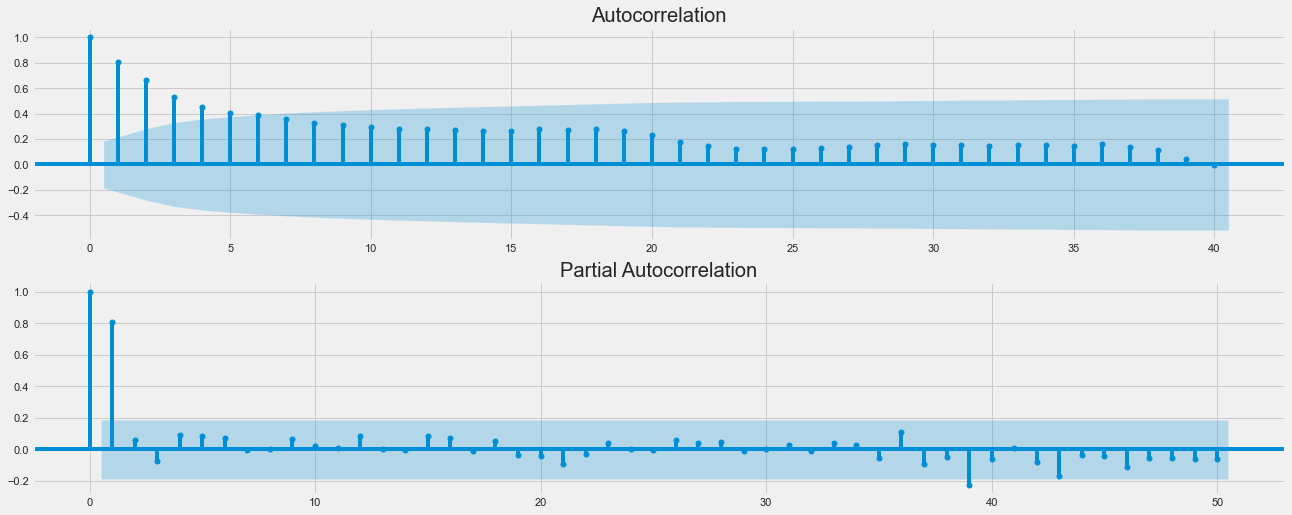

In [78]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(data.Weighted_Price, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(data.Weighted_Price, ax=pyplot.gca(), lags=50)
pyplot.show()

In [80]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(data.Weighted_Price, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [81]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters          aic
40  (2, 0, 2, 0)  1310.999337
41  (2, 0, 2, 1)  1312.270126
46  (2, 1, 2, 0)  1312.802725
47  (2, 1, 2, 1)  1314.114076
52  (2, 2, 2, 0)  1314.285479
                                     SARIMAX Results                                      
Dep. Variable:                     Weighted_Price   No. Observations:                  112
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -650.500
Date:                            Sun, 20 Jun 2021   AIC                           1310.999
Time:                                    20:03:37   BIC                           1322.452
Sample:                                12-31-2011   HQIC                          1315.563
                                     - 03-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

Dickey–Fuller test:: p=0.000000


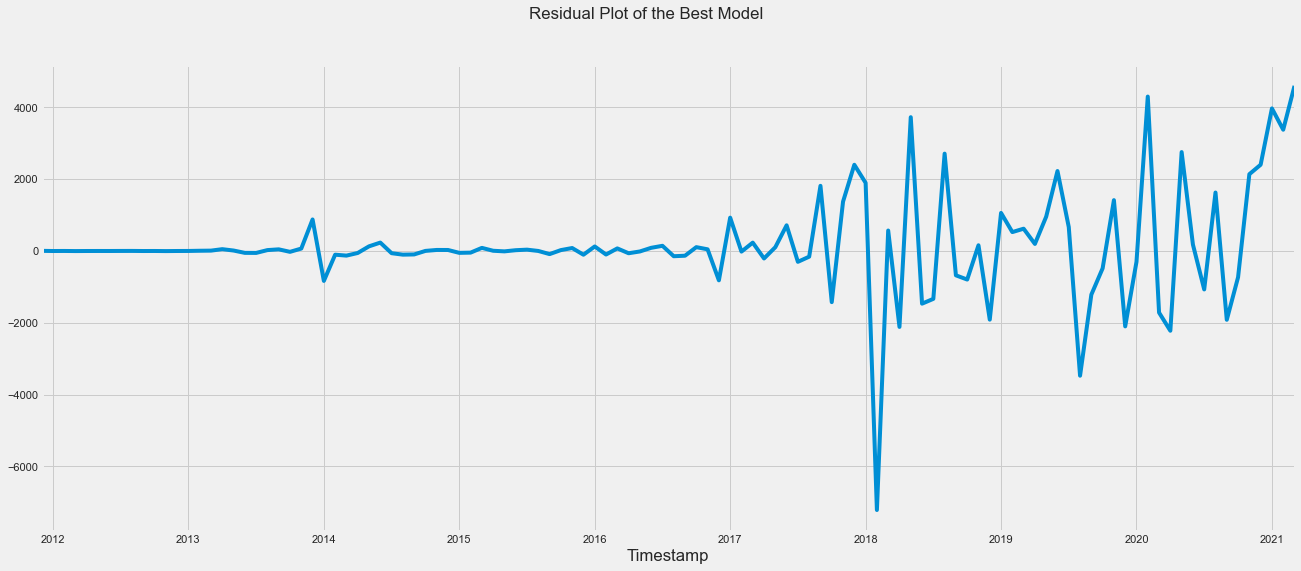

In [82]:
fig = plt.figure(figsize=(20,8))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

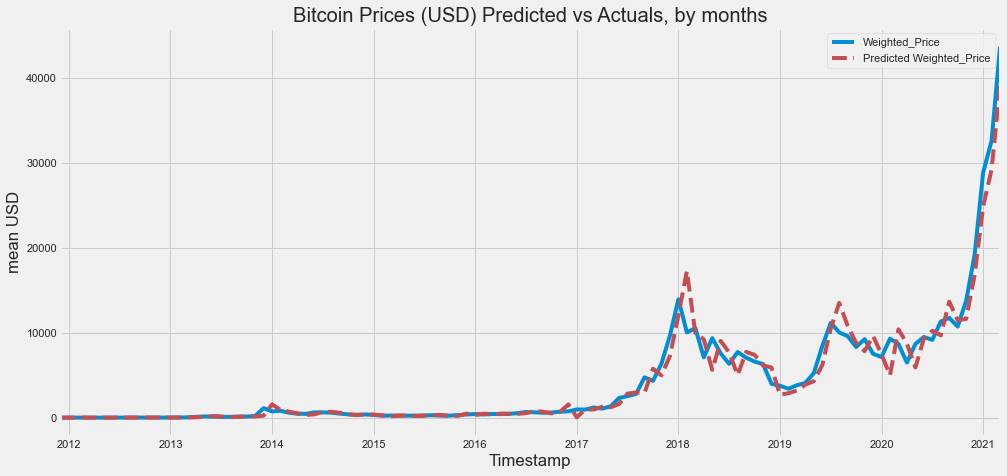

In [83]:
df_month2 = data[['Weighted_Price']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=200)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('mean USD')
plt.show()

## Prediction using rNN

In [84]:
df = data=pd.read_csv(r'C:\Users\rajat\Downloads\bitcoindata.csv')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [85]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [86]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [87]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
669/669 [==============================] - 2s 625us/step - loss: 0.0137
Epoch 2/100
669/669 [==============================] - 0s 710us/step - loss: 0.0108
Epoch 3/100
669/669 [==============================] - 0s 667us/step - loss: 0.0068
Epoch 4/100
669/669 [==============================] - 0s 703us/step - loss: 0.0051
Epoch 5/100
669/669 [==============================] - 0s 713us/step - loss: 0.0024
Epoch 6/100
669/669 [==============================] - 0s 697us/step - loss: 0.0010
Epoch 7/100
669/669 [==============================] - 0s 671us/step - loss: 3.0113e-04 0s - loss: 3.0609e-0
Epoch 8/100
669/669 [==============================] - 0s 690us/step - loss: 7.0013e-05
Epoch 9/100
669/669 [==============================] - 0s 697us/step - loss: 4.9146e-05
Epoch 10/100
669/669 [==============================] - 0s 668us/step - loss: 4.3535e-05
Epoch 11/100
669/669 [==============================] - 0s 654us/step - loss: 4.5129e-05
Epoch 12/100
669/669 [===========

669/669 [==============================] - 0s 640us/step - loss: 3.0180e-05
Epoch 94/100
669/669 [==============================] - 0s 639us/step - loss: 4.3332e-05
Epoch 95/100
669/669 [==============================] - 0s 624us/step - loss: 3.4821e-05
Epoch 96/100
669/669 [==============================] - 0s 645us/step - loss: 3.5784e-05
Epoch 97/100
669/669 [==============================] - 0s 634us/step - loss: 3.4564e-05
Epoch 98/100
669/669 [==============================] - 0s 629us/step - loss: 5.0032e-05
Epoch 99/100
669/669 [==============================] - 0s 658us/step - loss: 3.7348e-05
Epoch 100/100
669/669 [==============================] - 0s 676us/step - loss: 3.6582e-05


In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Weighted_Price   No. Observations:                  112
Model:             SARIMAX(2, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -649.817
Date:                              Sun, 20 Jun 2021   AIC                           1315.633
Time:                                      20:06:38   BIC                           1333.957
Sample:                                  12-31-2011   HQIC                          1322.936
                                       - 03-31-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2360      0.536      2.307      0.021       0.186       2.286
ar.L2         -0.4122      0.518     -0.795      0.427      -1.428       0.604
ma.L1         -0.7975      0.451     -1.767      0.077      -1.682       0.087
ma.L2          0.4847      0.182      2.662      0.008       0.128       0.842
ar.S.L12      -0.9246      0.199     -4.656      0.000      -1.314      -0.535
ar.S.L24      -0.7947      0.185     -4.306      0.000      -1.157      -0.433
ma.S.L12      -0.1377      0.344     -0.400      0.689      -0.812       0.537
sigma2      3.157e+06   3.46e+05      9.139      0.000    2.48e+06    3.83e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.59
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              89.83   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

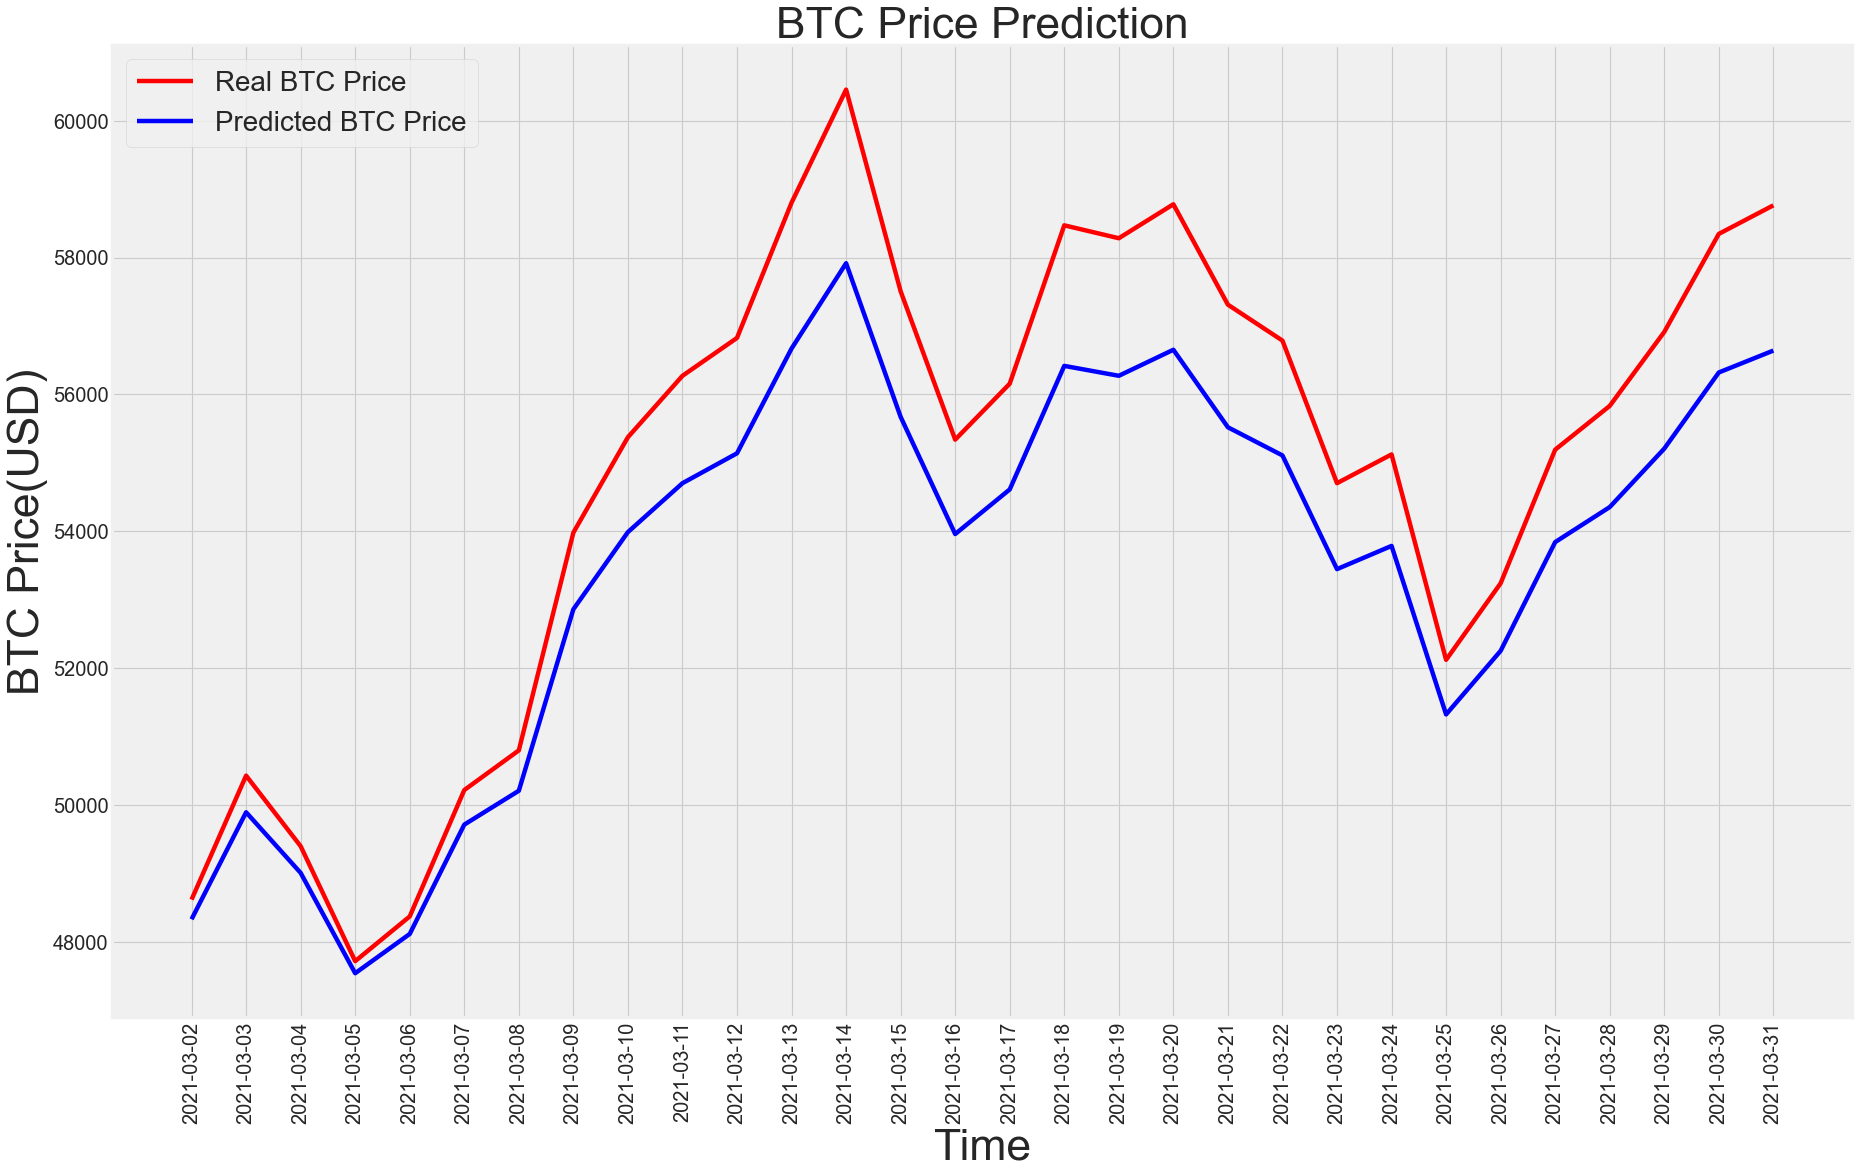

In [90]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()